In [1]:
import geoai

In [2]:
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"

In [3]:
raster_path = geoai.download_file(raster_url)

naip_train.tif: 100%|██████████| 12.1M/12.1M [00:01<00:00, 7.44MB/s]


In [4]:
vector_path = geoai.download_file(vector_url)

naip_train_buildings.geojson: 100%|██████████| 456k/456k [00:00<00:00, 2.00MB/s]


===== RASTER INFORMATION: naip_train.tif =====
Driver: GTiff
Dimensions: 2503 x 1126 pixels
Number of bands: 4
Data type: uint8
Coordinate Reference System: EPSG:26911
Georeferenced Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Pixel Resolution: 0.5999999999999953, 0.5999999999996691
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 12.00
  Max: 251.00
  Mean: 150.67
  Std Dev: 48.02
Band 2:
  Min: 49.00
  Max: 251.00
  Mean: 141.92
  Std Dev: 43.47
Band 3:
  Min: 53.00
  Max: 251.00
  Mean: 120.90
  Std Dev: 41.78
Band 4:
  Min: 22.00
  Max: 251.00
  Mean: 159.69
  Std Dev: 54.96


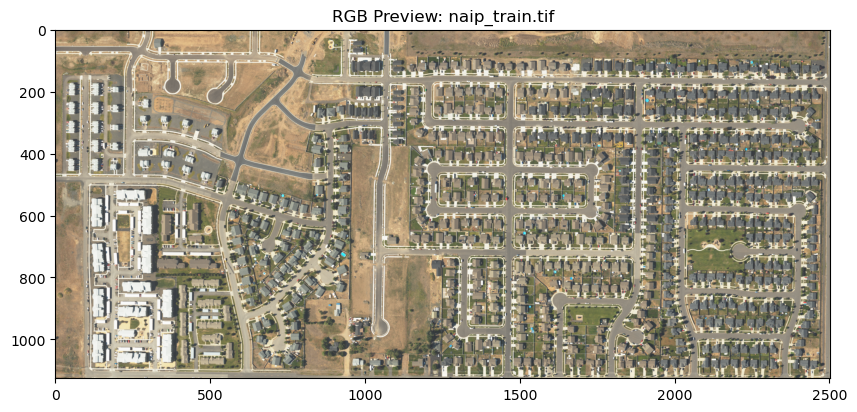

In [6]:
geoai.print_raster_info(raster_path, figsize=(10, 18))

In [ ]:
# directory using for further processing
geoai.get_raster_info(raster_path)["band_stats"]

[{'band': 1,
  'min': 12.0,
  'max': 251.0,
  'mean': 150.6730747259594,
  'std': 48.01908734374099},
 {'band': 2,
  'min': 49.0,
  'max': 251.0,
  'mean': 141.92468895229808,
  'std': 43.46595463573498},
 {'band': 3,
  'min': 53.0,
  'max': 251.0,
  'mean': 120.89909373405554,
  'std': 41.78086244480776},
 {'band': 4,
  'min': 22.0,
  'max': 251.0,
  'mean': 159.68995855062735,
  'std': 54.95588423977727}]

===== VECTOR INFORMATION: naip_train_buildings.geojson =====
Driver: GEOJSON
Feature count: 722
Geometry types: {'Polygon': 722}
Coordinate Reference System: EPSG:4326
Bounds: [-117.6017984, 47.65016239407519, -117.58246913360121, 47.655846]
Number of attributes: 8
Attribute names: id, version, sources, subtype, class, height, has_parts, is_underground

----- Attribute Statistics -----
Attribute: version
  min: 0
  max: 0
  mean: 0.0000
  std: 0.0000
  null_count: 0
Attribute: height
  min: 2.0198
  max: 6.3780
  mean: 4.9893
  std: 0.8086
  null_count: 397


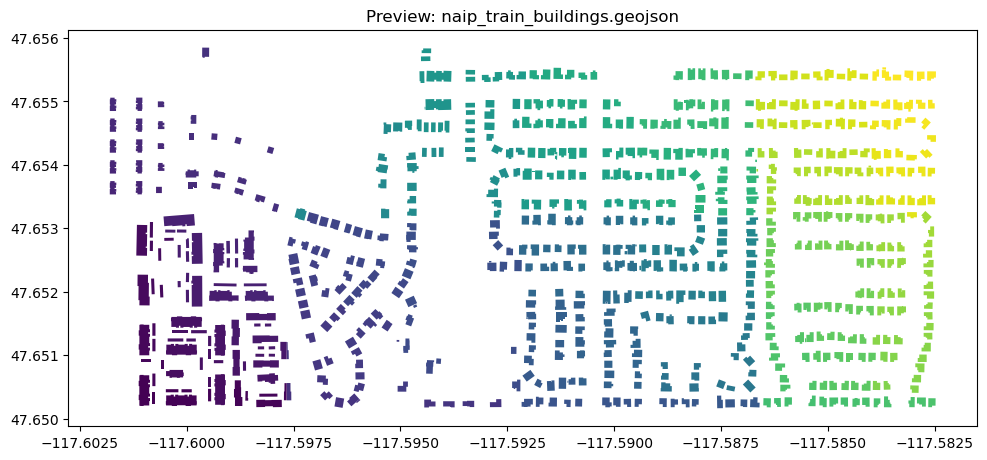

In [7]:
geoai.print_vector_info(vector_path)

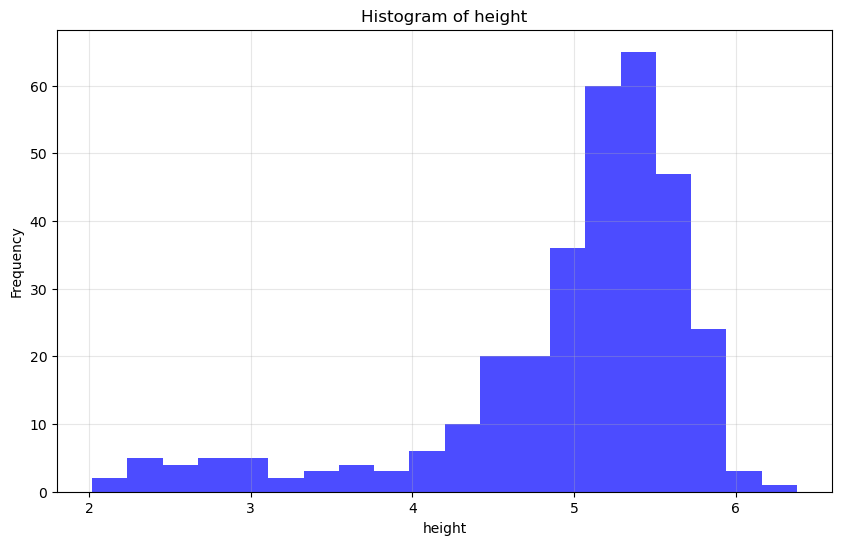

{'attribute': 'height',
 'type': 'numeric',
 'count': np.int64(325),
 'null_count': np.int64(397),
 'min': np.float64(2.0197694),
 'max': np.float64(6.3780174),
 'mean': np.float64(4.989292356615385),
 'median': np.float64(5.2050776),
 'std': np.float64(0.8086136381053566),
 'unique_values': 325}

In [10]:
geoai.analyze_vector_attributes(vector_path, "height")

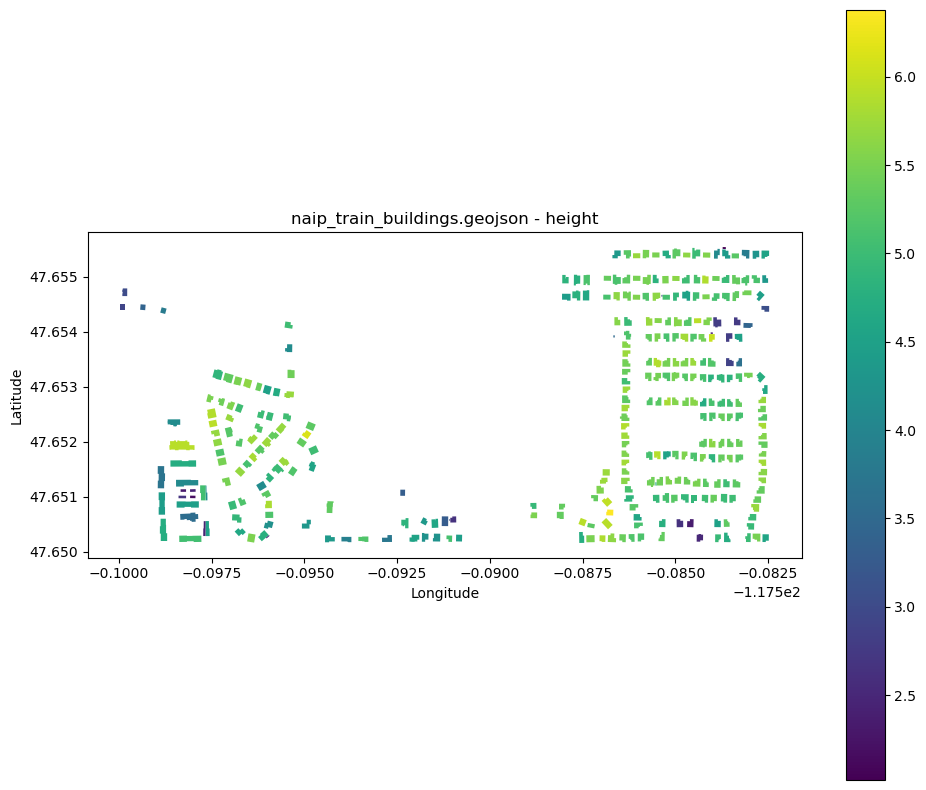

In [11]:
geoai.visualize_vector_by_attribute(vector_path, "height")

In [12]:
clip_raster_path = "naip_clip.tif"

In [13]:
geoai.clip_raster_by_bbox(
    raster_path,
    clip_raster_path,
    bbox=(0, 0, 1000, 1000),
    bands=[4, 1, 2],
    bbox_type="pixel",
)

'naip_clip.tif'

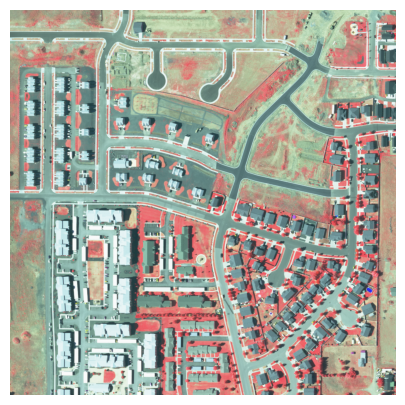

In [15]:
geoai.view_image(clip_raster_path)